In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# loading datasets

In [2]:
DATASET_PATH ="../../Datasets/FlowerRecog"
IMG_SIZE=(224,224)
BATCH_SIZE = 32 




In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split=0.2

)

In [9]:
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="training"
)

images, labels = next(train_generator)  # Fetch a batch

print("Image batch shape:", images.shape)  # (batch_size, height, width, channels)
print("Label batch shape:", labels.shape)  # (batch_size, num_classes)
print("First Image NumPy Array:")
print(images[0])  # Print raw pixel values

Found 3457 images belonging to 5 classes.
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
First Image NumPy Array:
[[[0.8000001  0.8235295  0.8235295 ]
  [0.45098042 0.40784317 0.7058824 ]
  [0.21960786 0.16078432 0.53333336]
  ...
  [0.9333334  0.78823537 0.27058825]
  [0.49803925 0.42352945 0.1137255 ]
  [0.14509805 0.2901961  0.02745098]]

 [[0.9215687  0.94117653 0.9176471 ]
  [0.97647065 0.9843138  0.9294118 ]
  [0.9294118  0.9176471  0.95294124]
  ...
  [0.94117653 0.80392164 0.20784315]
  [0.6392157  0.5568628  0.06666667]
  [0.19607845 0.34117648 0.07058824]]

 [[0.8941177  0.909804   0.854902  ]
  [0.9176471  0.91372555 0.9058824 ]
  [0.9607844  0.9568628  0.8862746 ]
  ...
  [0.92549026 0.7960785  0.18823531]
  [0.8745099  0.7568628  0.16862746]
  [0.20392159 0.3254902  0.19215688]]

 ...

 [[0.20784315 0.14901961 0.4666667 ]
  [0.20784315 0.20784315 0.4431373 ]
  [0.2509804  0.23529413 0.43137258]
  ...
  [0.00392157 0.04313726 0.01176471]
  [0.03137255 0.05490

In [10]:
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",
    subset="validation"
)

Found 860 images belonging to 5 classes.


In [11]:
class_names = list(train_generator.class_indices.keys())
print(f"Class Labels: {class_names}")

Class Labels: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


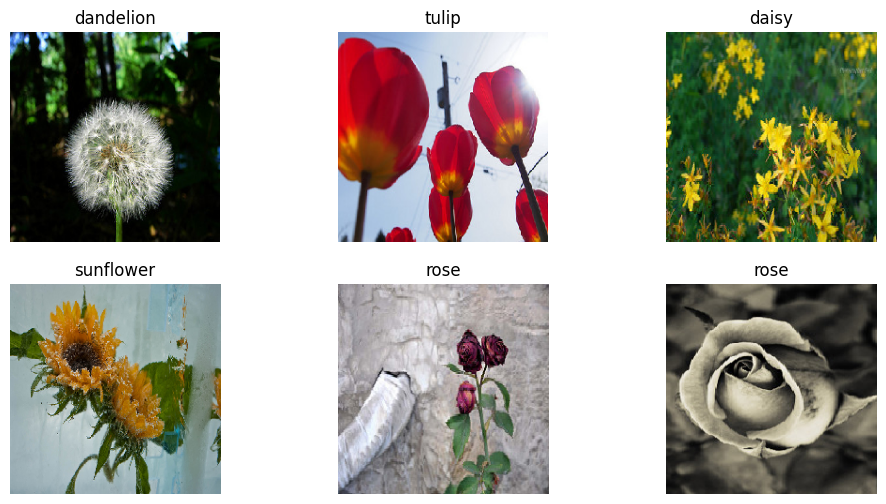

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
sample_images, sample_labels = next(train_generator)

# Plot images
plt.figure(figsize=(12, 6))
for i in range(6):  # Display 6 images
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[int(sample_labels[i])])  # Class label
    plt.axis("off")
plt.show()


Define Pretrained

In [ ]:
# Load the pre-trained VGG16 model (without the classifier head)
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False  # Freeze the convolutional base
# Custom classifier on top
flatten_output = Flatten()(base_model_vgg.output)  # Flatten the feature maps
dense_output = Dense(512, activation="relu")(flatten_output)  # Fully connected layer
dropout_output = Dropout(0.5)(dense_output)  # Regularization
final_output = Dense(len(class_names), activation="softmax")(dropout_output)  # Output layer

# Create the final model
model_vgg = Model(inputs=base_model_vgg.input, outputs=final_output)


In [17]:
def compile_and_train(model, train_gen, val_gen, epochs=10):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)
    return history

In [18]:
history_vgg = compile_and_train(model_vgg, train_generator, val_generator, epochs=10)


e:\ml\AI models\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.4990 - loss: 1.2503 - val_accuracy: 0.7837 - val_loss: 0.6186
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.7967 - loss: 0.5649 - val_accuracy: 0.8047 - val_loss: 0.5488
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.8694 - loss: 0.4004 - val_accuracy: 0.7860 - val_loss: 0.5630
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9019 - loss: 0.2991 - val_accuracy: 0.8174 - val_loss: 0.5357
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.9107 - loss: 0.2710 - val_accuracy: 0.8116 - val_loss: 0.5135
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9354 - loss: 0.2086 - val_accuracy: 0.8081 - val_loss: 0.5188
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.9561 - loss: 0.1681 - val_accuracy: 0.8035 - val_loss: 0.5309
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9587 - loss: 0.1403 - val_accu

In [20]:
val_loss_vgg, val_acc_vgg = model_vgg.evaluate(val_generator)

print(f"VGG-16 Validation Accuracy: {val_acc_vgg*100:.2f}%")


27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8491 - loss: 0.4799
VGG-16 Validation Accuracy: 82.21%


In [21]:
model_vgg.save('flower_model.h5')